In [118]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
%matplotlib inline

In [101]:
input_file = "Crimes.csv"

In [102]:
df = pd.read_csv(input_file, skip_blank_lines=True)
keep_col = ['Date','Block','Primary Type','Description','Arrest','District','Ward','FBI Code', 'Latitude', 'Longitude']
new_df = df[keep_col]

In [103]:
new_df.head()

Date                  Block Primary Type  \
0  05/03/2016 09:00:00 PM     042XX W MADISON ST    NARCOTICS   
1  05/03/2016 09:35:00 PM    065XX S KEDVALE AVE        THEFT   
2  05/03/2016 02:45:00 PM      045XX S DAMEN AVE      ASSAULT   
3  05/03/2016 06:42:00 PM  063XX S CLAREMONT AVE      BATTERY   
4  05/03/2016 03:00:00 PM    070XX S INDIANA AVE      ROBBERY   

                    Description Arrest  District  Ward FBI Code   Latitude  \
0  POSS: CANNABIS 30GMS OR LESS   True        11    28       18  41.880658   
1                     OVER $500  False         8    13       06  41.774141   
2                        SIMPLE  False         9    12      08A  41.811698   
3       DOMESTIC BATTERY SIMPLE  False         8    15      08B  41.778661   
4         STRONGARM - NO WEAPON  False         3     6       03  41.766961   

   Longitude  
0 -87.731212  
1 -87.726307  
2 -87.675214  
3 -87.682273  
4 -87.620152

In [104]:
new_df.insert(10,'Safety Value','')
new_df.insert(11,'Label','')
#df[~df.Block.str.contains("كونت")]

In [105]:
new_df.head()

Date                  Block Primary Type  \
0  05/03/2016 09:00:00 PM     042XX W MADISON ST    NARCOTICS   
1  05/03/2016 09:35:00 PM    065XX S KEDVALE AVE        THEFT   
2  05/03/2016 02:45:00 PM      045XX S DAMEN AVE      ASSAULT   
3  05/03/2016 06:42:00 PM  063XX S CLAREMONT AVE      BATTERY   
4  05/03/2016 03:00:00 PM    070XX S INDIANA AVE      ROBBERY   

                    Description Arrest  District  Ward FBI Code   Latitude  \
0  POSS: CANNABIS 30GMS OR LESS   True        11    28       18  41.880658   
1                     OVER $500  False         8    13       06  41.774141   
2                        SIMPLE  False         9    12      08A  41.811698   
3       DOMESTIC BATTERY SIMPLE  False         8    15      08B  41.778661   
4         STRONGARM - NO WEAPON  False         3     6       03  41.766961   

   Longitude Safety Value Label  
0 -87.731212                     
1 -87.726307                     
2 -87.675214                     
3 -87.682273                     
4 -87.620152

In [106]:
new_df.insert(3,'Crime Weightage','')
new_df.head()
crime_type = new_df['Primary Type']
crime_weightage = new_df['Crime Weightage']

In [107]:
#crime_weightage[1] = 4
for i in crime_type:
    #print(i)
    if(i == 'NARCOTICS' or i == 'ASSAULT' or i == 'SEX OFFENSE' or 'CRIM SEXUAL ASSAULT' or 'HOMICIDE' or 'HUMAN TRAFFICKING'):
        print(i)
        #crime_weightage[j] = 4
    #j = j+1
new_df.head()        
#print('hello')   

NARCOTICS
THEFT
ASSAULT
BATTERY
ROBBERY
OTHER OFFENSE
ASSAULT
THEFT
NARCOTICS
OTHER OFFENSE
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
DECEPTIVE PRACTICE
THEFT
THEFT
CRIMINAL DAMAGE
LIQUOR LAW VIOLATION
THEFT
CRIMINAL DAMAGE
ASSAULT
NARCOTICS
OTHER OFFENSE
THEFT
BURGLARY
ROBBERY
BATTERY
ASSAULT
NARCOTICS
WEAPONS VIOLATION
ASSAULT
ASSAULT
BATTERY
BATTERY
BATTERY
ASSAULT
OTHER OFFENSE
ROBBERY
ASSAULT
OFFENSE INVOLVING CHILDREN
OTHER OFFENSE
BATTERY
BATTERY
OTHER OFFENSE
SEX OFFENSE
ASSAULT
CRIMINAL DAMAGE
ROBBERY
OTHER OFFENSE
BATTERY
ROBBERY
BATTERY
BATTERY
CRIMINAL DAMAGE
BATTERY
BATTERY
OTHER OFFENSE
BATTERY
BATTERY
PUBLIC PEACE VIOLATION
BATTERY
THEFT
BATTERY
BATTERY
BATTERY
BATTERY
BATTERY
WEAPONS VIOLATION
BATTERY
THEFT
THEFT
THEFT
BATTERY
THEFT
ROBBERY
MOTOR VEHICLE THEFT
BATTERY
ASSAULT
ASSAULT
THEFT
THEFT
OTHER OFFENSE
THEFT
THEFT
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
BATTERY
THEFT
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
THEFT
CRIMIN

Date                  Block Primary Type Crime Weightage  \
0  05/03/2016 09:00:00 PM     042XX W MADISON ST    NARCOTICS                   
1  05/03/2016 09:35:00 PM    065XX S KEDVALE AVE        THEFT                   
2  05/03/2016 02:45:00 PM      045XX S DAMEN AVE      ASSAULT                   
3  05/03/2016 06:42:00 PM  063XX S CLAREMONT AVE      BATTERY                   
4  05/03/2016 03:00:00 PM    070XX S INDIANA AVE      ROBBERY                   

                    Description Arrest  District  Ward FBI Code   Latitude  \
0  POSS: CANNABIS 30GMS OR LESS   True        11    28       18  41.880658   
1                     OVER $500  False         8    13       06  41.774141   
2                        SIMPLE  False         9    12      08A  41.811698   
3       DOMESTIC BATTERY SIMPLE  False         8    15      08B  41.778661   
4         STRONGARM - NO WEAPON  False         3     6       03  41.766961   

   Longitude Safety Value Label  
0 -87.731212                     
1 -87.726307                     
2 -87.675214                     
3 -87.682273                     
4 -87.620152

In [108]:
new_df.head()

Date                  Block Primary Type Crime Weightage  \
0  05/03/2016 09:00:00 PM     042XX W MADISON ST    NARCOTICS                   
1  05/03/2016 09:35:00 PM    065XX S KEDVALE AVE        THEFT                   
2  05/03/2016 02:45:00 PM      045XX S DAMEN AVE      ASSAULT                   
3  05/03/2016 06:42:00 PM  063XX S CLAREMONT AVE      BATTERY                   
4  05/03/2016 03:00:00 PM    070XX S INDIANA AVE      ROBBERY                   

                    Description Arrest  District  Ward FBI Code   Latitude  \
0  POSS: CANNABIS 30GMS OR LESS   True        11    28       18  41.880658   
1                     OVER $500  False         8    13       06  41.774141   
2                        SIMPLE  False         9    12      08A  41.811698   
3       DOMESTIC BATTERY SIMPLE  False         8    15      08B  41.778661   
4         STRONGARM - NO WEAPON  False         3     6       03  41.766961   

   Longitude Safety Value Label  
0 -87.731212                     
1 -87.726307                     
2 -87.675214                     
3 -87.682273                     
4 -87.620152

In [109]:
new_df.columns

Index(['Date', 'Block', 'Primary Type', 'Crime Weightage', 'Description',
       'Arrest', 'District', 'Ward', 'FBI Code', 'Latitude', 'Longitude',
       'Safety Value', 'Label'],
      dtype='object')

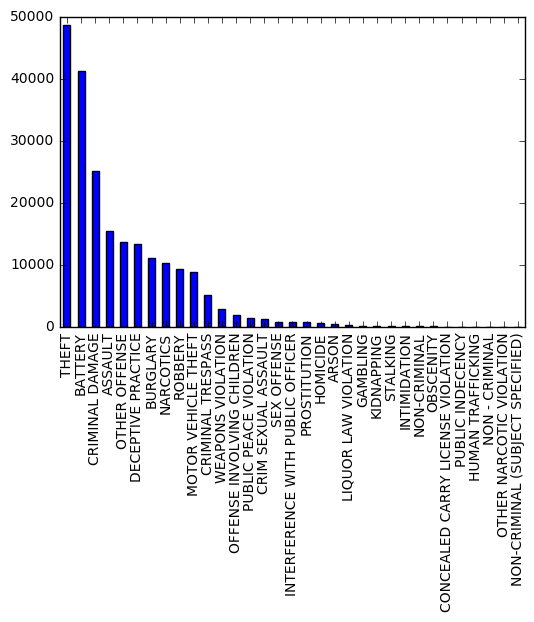

In [110]:
fig, ax = plt.subplots()
df['Primary Type'].value_counts().plot(ax=ax, kind='bar')

In [111]:
print(df.shape)

(213464, 22)


In [112]:
print(crime_type.shape)

(213464,)


In [113]:
new_df.columns

Index(['Date', 'Block', 'Primary Type', 'Crime Weightage', 'Description',
       'Arrest', 'District', 'Ward', 'FBI Code', 'Latitude', 'Longitude',
       'Safety Value', 'Label'],
      dtype='object')

In [115]:
mymap = {'THEFT':1,'BATTERY':2,'CRIMINAL DAMAGE':3,'ASSAULT':4,'OTHER OFFENSE':5,
         'DECEPTIVE PRACTICE':6,'BURGLARY':7,'NARCOTICS':8,'ROBBERY':9,'MOTOR VEHICLE THEFT':10,
         'CRIMINAL TRESPASS':11,'WEAPONS VIOLATION':12,'OFFENSE INVOLVING CHILDREN':13,'PUBLIC PEACE VIOLATION':14,
         'CRIM SEXUAL ASSAULT':15,'SEX OFFENSE':16,'INTERFERENCE WITH PUBLIC OFFICER':17,'PROSTITUTION':18,'HOMICIDE':19,'ARSON':20,'LIQUOR LAW VIOLATION':21,
        'GAMBLING':22,'KIDNAPPING':23,'STALKING':24,'INTIMIDATION':25,'NON-CRIMINAL':26,'OBSCENITY':27,'CONCEALED CARRY LICENSE VIOLATION':28,'PUBLIC INDECENCY':29,
        'HUMAN TRAFFICKING':30,'NON - CRIMINAL':31,'OTHER NARCOTIC VIOLATION':32,'NON-CRIMINAL (SUBJECT SPECIFIED)':33}

In [116]:
new_df.applymap(lambda s: mymap.get(s) if s in mymap else s)
#new_df.replace({'THEFT': mymap, 'NARCOTICS': mymap})

Date                     Block  Primary Type  \
0       05/03/2016 09:00:00 PM        042XX W MADISON ST             8   
1       05/03/2016 09:35:00 PM       065XX S KEDVALE AVE             1   
2       05/03/2016 02:45:00 PM         045XX S DAMEN AVE             4   
3       05/03/2016 06:42:00 PM     063XX S CLAREMONT AVE             2   
4       05/03/2016 03:00:00 PM       070XX S INDIANA AVE             9   
5       05/03/2016 10:02:00 PM        0000X N HOMAN BLVD             5   
6       05/03/2016 03:30:00 PM       004XX S HAMLIN BLVD             4   
7       05/03/2016 09:09:00 PM      062XX S MICHIGAN AVE             1   
8       05/03/2016 09:42:00 PM      060XX S EBERHART AVE             8   
9       05/03/2016 08:42:00 PM         067XX S LAFLIN ST             5   
10      05/03/2016 10:15:00 PM        074XX S RACINE AVE             2   
11      05/03/2016 09:30:00 AM         033XX W OGDEN AVE             3   
12      05/03/2016 09:15:00 PM        087XX W FOSTER AVE             3   
13      05/03/2016 10:30:00 PM     032XX N MILWAUKEE AVE             2   
14      05/03/2016 07:30:00 AM     062XX W PATTERSON AVE             6   
15      05/03/2016 05:30:00 PM          002XX S STATE ST             1   
16      05/03/2016 01:30:00 PM       0000X E RANDOLPH ST             1   
17      05/03/2016 11:30:00 PM         059XX W FULTON ST             3   
18      05/03/2016 09:41:00 PM      048XX W MONTROSE AVE            21   
19      05/03/2016 09:45:00 PM      053XX S CARPENTER ST             1   
20      05/03/2016 09:30:00 PM       059XX S CALUMET AVE             3   
21      05/03/2016 10:13:00 PM           048XX W RICE ST             4   
22      05/03/2016 10:38:00 PM           033XX W 62ND PL             8   
23      05/03/2016 09:40:00 PM        054XX S ARCHER AVE             5   
24      05/03/2016 11:00:00 PM       012XX W RANDOLPH ST             1   
25      05/03/2016 10:00:00 AM      007XX S LAWNDALE AVE             7   
26      05/03/2016 11:15:00 PM      039XX W FERDINAND ST             9   
27      05/03/2016 10:10:00 PM   041XX W WASHINGTON BLVD             2   
28      05/03/2016 10:32:00 PM     037XX S HERMITAGE AVE             4   
29      05/03/2016 10:07:00 PM      035XX W ROOSEVELT RD             8   
...                        ...                       ...           ...   
213434  03/01/2016 12:00:00 PM      023XX N PARKSIDE AVE             6   
213435  10/12/2016 09:00:00 AM         019XX N DRAKE AVE             5   
213436  10/19/2016 02:00:00 AM          023XX W 103RD ST             1   
213437  10/17/2016 01:00:00 PM       102XX S WESTERN AVE             6   
213438  09/15/2016 12:00:00 PM     070XX S WENTWORTH AVE             7   
213439  10/18/2016 02:11:00 PM       021XX N LINCOLN AVE             1   
213440  08/30/2016 02:00:00 PM          017XX S STATE ST             5   
213441  10/18/2016 06:33:00 PM         046XX W NORTH AVE             1   
213442  09/12/2016 12:00:00 PM      005XX W BROMPTON AVE             6   
213443  10/15/2016 01:00:00 PM       017XX N NATCHEZ AVE             1   
213444  10/19/2016 10:00:00 PM         064XX W DEVON AVE             1   
213445  09/13/2016 05:00:00 PM         064XX W GRAND AVE             6   
213446  10/05/2016 02:56:00 PM       005XX N HARDING AVE             5   
213447  10/15/2016 03:15:00 PM          040XX S STATE ST             7   
213448  09/07/2016 07:30:00 PM   015XX N WICKER PARK AVE            10   
213449  08/25/2016 11:59:00 AM        062XX S TALMAN AVE             5   
213450  10/05/2016 11:00:00 PM        007XX W GORDON TER             5   
213451  10/18/2016 04:11:00 AM  092XX S STONY ISLAND AVE             1   
213452  10/15/2016 04:30:00 PM      072XX S PHILLIPS AVE             3   
213453  10/03/2016 12:01:00 AM          036XX S WELLS ST             6   
213454  10/10/2016 01:00:00 PM      086XX S KILBOURN AVE             1   
213455  10/17/2016 06:59:00 AM       003XX N KOSTNER AVE             1   
213456  01/23/2016 12:00:00 PM

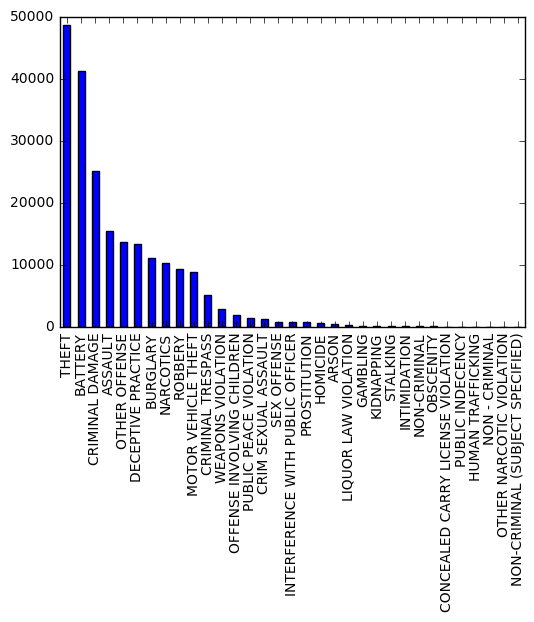

In [117]:
fig, ax = plt.subplots()
new_df['Primary Type'].value_counts().plot(ax=ax, kind='bar')

I think the following would work

from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()

#to convert into numbers

train.Sex = le_sex.fit_transform(train.Sex)

#to convert back

train.Sex = le_sex.inverse_transform(train.Sex)

I hope that helps

In [124]:
crime_type = pd.Series(new_df['Primary Type'])

In [125]:
crime_type.describe()

count     213464
unique        33
top        THEFT
freq       48667
Name: Primary Type, dtype: object

In [126]:
def score_to_numeric(x):
    if x=='THEFT':
        return 1
    if x=='BATTERY':
        return 2
    if x=='CRIMINAL DAMAGE':
        return 3

In [127]:
new_df['Crime Weightage'] = df['Primary Type'].apply(score_to_numeric)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [129]:
new_df.head()

Date                  Block Primary Type  \
0  05/03/2016 09:00:00 PM     042XX W MADISON ST    NARCOTICS   
1  05/03/2016 09:35:00 PM    065XX S KEDVALE AVE        THEFT   
2  05/03/2016 02:45:00 PM      045XX S DAMEN AVE      ASSAULT   
3  05/03/2016 06:42:00 PM  063XX S CLAREMONT AVE      BATTERY   
4  05/03/2016 03:00:00 PM    070XX S INDIANA AVE      ROBBERY   

   Crime Weightage                   Description Arrest  District  Ward  \
0              NaN  POSS: CANNABIS 30GMS OR LESS   True        11    28   
1              1.0                     OVER $500  False         8    13   
2              NaN                        SIMPLE  False         9    12   
3              2.0       DOMESTIC BATTERY SIMPLE  False         8    15   
4              NaN         STRONGARM - NO WEAPON  False         3     6   

  FBI Code   Latitude  Longitude Safety Value Label  
0       18  41.880658 -87.731212                     
1       06  41.774141 -87.726307                     
2      08A  41.811698 -87.675214                     
3      08B  41.778661 -87.682273                     
4       03  41.766961 -87.620152

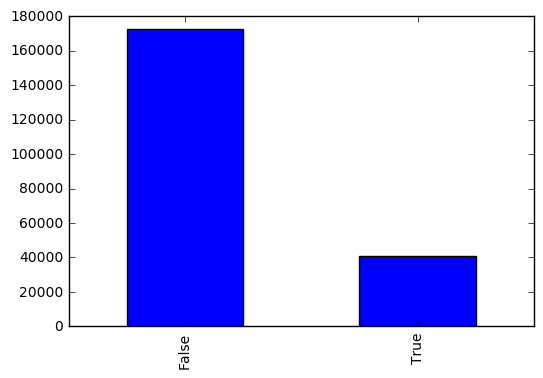

In [130]:
fig, ax = plt.subplots()
new_df['Arrest'].value_counts().plot(ax=ax, kind='bar')

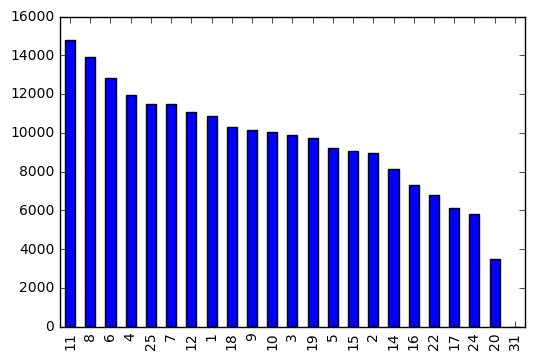

In [131]:
fig, ax = plt.subplots()
new_df['District'].value_counts().plot(ax=ax, kind='bar')

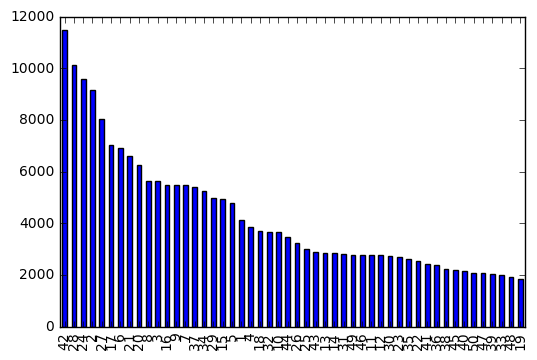

In [132]:
fig, ax = plt.subplots()
new_df['Ward'].value_counts().plot(ax=ax, kind='bar')

In [134]:
new_df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Crime Weightage       District           Ward       Latitude  \
count    115075.000000  213464.000000  213464.000000  202658.000000   
mean          1.795725      11.223766      22.974057      41.843440   
std           0.774488       6.891420      13.921673       0.085298   
min           1.000000       1.000000       1.000000      41.644608   
25%                NaN       6.000000      10.000000            NaN   
50%                NaN      10.000000      23.000000            NaN   
75%                NaN      17.000000      34.000000            NaN   
max           3.000000      31.000000      50.000000      42.022671   

           Longitude  
count  202658.000000  
mean      -87.671862  
std         0.058918  
min       -87.928909  
25%              NaN  
50%              NaN  
75%              NaN  
max       -87.524529